# Project for Pacmann Probability Course

## Import Libs

In [1]:
import matplotlib
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib.font_manager as font_manager
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

## Import Font & Set Styles for Graphs

In [2]:
# import ROBOTO
load_roboto()

# set style
seaborn = 'seaborn-white'
mpl = 'fivethirtyeight'

# color palette
male_cat = '#a2d2ff'
female_cat = '#ffc8dd'
hist_sn = '#bde0fe'
dist_sn = '#e63946' 
bmiL25_cat ='#8ac926'
bmiM25_cat = '#ff595e'
smoker_cat = '#6930c3'
nosmoker_cat = '#72efdd'
density_red = '#e63946'
distribution_blue = '#bde0fe'


## Import Data

In [3]:
insurance_data = pd.read_csv('./data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive Statistics Analysis

### Customer Segment by Age

In [4]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.21


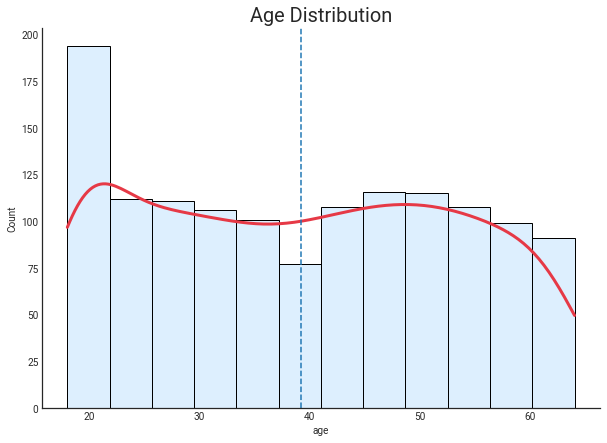

In [5]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.histplot(
        ax=ax, 
        data=insurance_data, 
        x='age', 
        color=distribution_blue, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'})
    ax.lines[0].set_color(density_red)
    ax.axvline(x=insurance_data['age'].mean(), linestyle='--')
    ax.set_title("Age Distribution", fontsize=20)

### Smoker Age by Sex

In [6]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

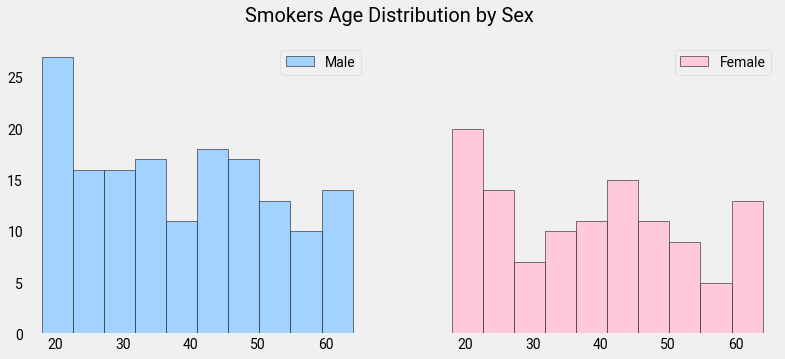

In [7]:
with plt.style.context(mpl): # set temporary style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)

    ax1.hist(male_smoker['age'], edgecolor='black', color=male_cat, label='Male')
    ax2.hist(female_smoker['age'], edgecolor='black', color=female_cat, label='Female')

    ax1.grid(visible=False)
    ax2.grid(visible=False)

    plt.suptitle("Smokers Age Distribution by Sex", fontsize=20)

    ax1.legend()
    ax2.legend()
    plt.show();

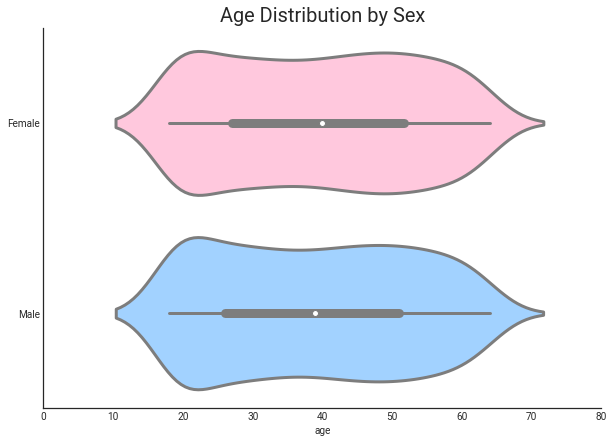

In [8]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    my_pal = {"female": female_cat, "male": male_cat}

    sns.violinplot(
        ax=ax, 
        x='age', 
        y='sex', 
        data=insurance_data, 
        palette=my_pal, 
        saturation=1, 
        linewidth=3)
    ax.set_title('Age Distribution by Sex', size=20, fontweight="bold")
    ax.set_yticklabels(['Female', 'Male'])
    ax.set_xlim(0, 80)
    ax.set(ylabel=None)
    

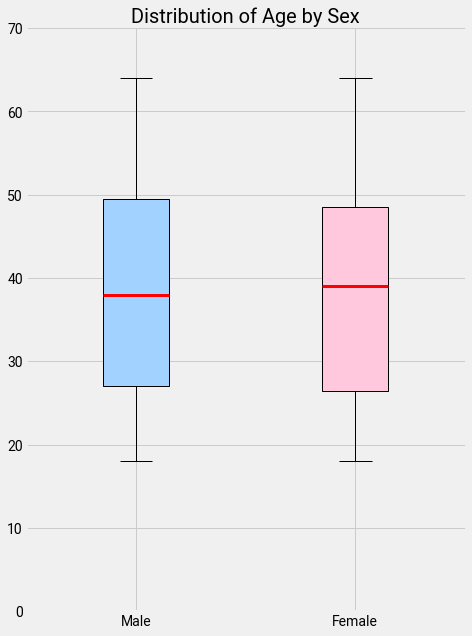

In [9]:
with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(7, 10))
    male_smoker = smoker[smoker['sex'] == 'male']  
    female_smoker = smoker[smoker['sex'] == 'female']
    labels = ['Male', 'Female']  
    data = [male_smoker['age'], female_smoker['age']]
    bp = ax.boxplot(
        data, 
        vert=True, 
        patch_artist=True, 
        widths = 0.3
        )

    ax.grid(visible=True)
    ax.set_xticklabels(['Male', 'Female']) 
    ax.set_ylim(0, 70)
    ax.set_title('Distribution of Age by Sex', fontsize=20)

    colors = [male_cat, female_cat] 
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    # changing color and linewidth of medians 
    for median in bp['medians']: median.set(color ='red', linewidth = 3) 


### BMI Distribution

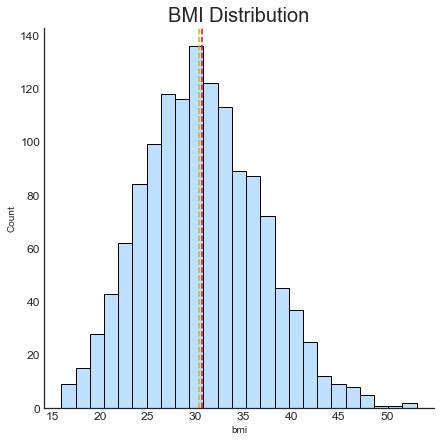

In [10]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='bmi',
        edgecolor='black',
        facecolor=distribution_blue,
        bins=25
        )
    ax.axvline(insurance_data.bmi.mean(),color='r', linestyle='--')
    ax.axvline(insurance_data.bmi.median(),color='y', linestyle='--')
    ax.set_title("BMI Distribution", fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.show()

#### Smoker BMI Mean & Median & Mode 

In [11]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_mean, 3)

30.708


In [12]:
smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
print_format(smokerBMI_median, 3)

30.447


In [13]:
smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'yes']
    )['bmi']
    ).agg(pd.Series.mode)[0]
print_format(smokerBMI_mode, 3)

28.310


#### Non-smoker BMI Mean & Median & Mode

In [14]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_mean, 3)

30.652


In [15]:
no_smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
print_format(no_smokerBMI_median, 3)

30.352


In [16]:
no_smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'no']
    )['bmi']
    ).agg(pd.Series.mode)[0]
print_format(smokerBMI_mode, 3)

28.310


In [17]:
bmi_stats = pd.DataFrame({
    'Status': ['Smoker', 'Non-Smoker'],
    'Mean': [smokerBMI_mean, no_smokerBMI_mean],
    'Median': [smokerBMI_median, no_smokerBMI_mean],
    'Mode': [smokerBMI_mode, no_smokerBMI_mode],
})
bmi_stats

,Status,Mean,Median,Mode
0,Smoker,30.708449,30.447500,28.31
1,Non-Smoker,30.651795,30.651795,32.30


### Variance of Charges

#### Smoker

In [18]:
# variance
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
print(numerize(smoker_charges_var))

133.21M


In [19]:
# std
print(numerize(sqrt(smoker_charges_var)))

11.54K


#### Non-smoker Variance

In [20]:
# variance
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)
print(numerize(non_smoker_charges_var))

35.93M


In [21]:
# std
print(numerize(sqrt(non_smoker_charges_var)))

5.99K


In [22]:
charges_variance_stats = pd.DataFrame({
    'Status': ['Smoker', 'Non-Smoker'],
    'Variance': [numerize(smoker_charges_var), numerize(non_smoker_charges_var)],
    'Standard Deviation': [numerize(sqrt(smoker_charges_var)), numerize(sqrt(non_smoker_charges_var))]
})
charges_variance_stats

,Status,Variance,Standard Deviation
0,Smoker,133.21M,11.54K
1,Non-Smoker,35.93M,5.99K


### Charges by Sex, Smoker, and Age 

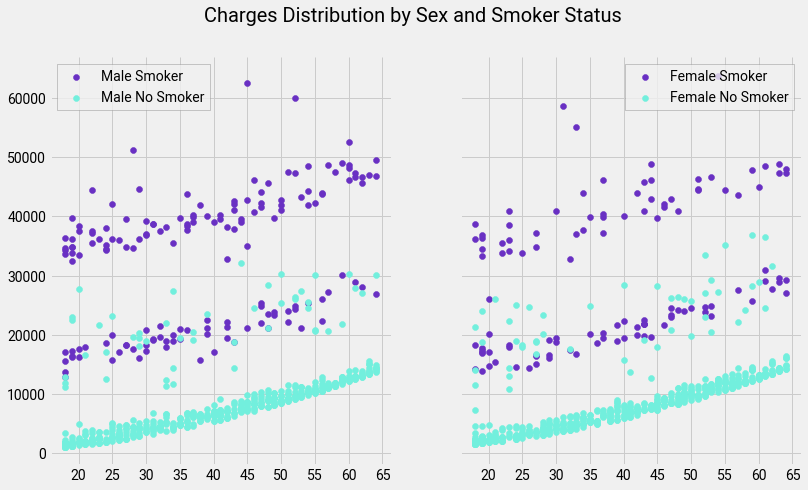

In [23]:
# male and female smoker are already present
# get non smokers category by sex
male_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'male')]
female_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'female')]

with plt.style.context(mpl):  
    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    # cat: sex, dimension: age, charges
    ax1.scatter(male_smoker['age'], male_smoker['charges'], c=smoker_cat, label='Male Smoker')
    ax2.scatter(female_smoker['age'], female_smoker['charges'], c=smoker_cat, label='Female Smoker')
    ax1.scatter(male_no_smoker['age'], male_no_smoker['charges'], c=nosmoker_cat, label='Male No Smoker')
    ax2.scatter(female_no_smoker['age'], female_no_smoker['charges'], c=nosmoker_cat, label='Female No Smoker')

    ax1.legend(fontsize='medium', edgecolor='gray', fancybox=False)
    ax2.legend(fontsize='medium', edgecolor='gray', fancybox=False)

    plt.suptitle("Charges Distribution by Sex and Smoker Status", fontsize=20)

    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age > 25

In [26]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

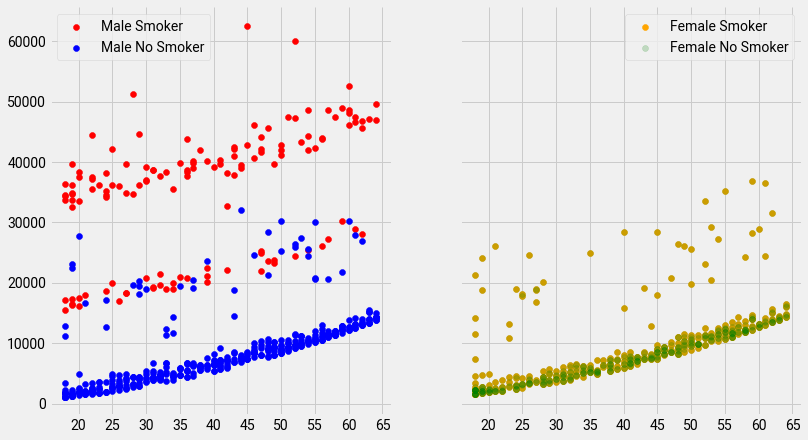

In [27]:
with plt.style.context(mpl): 
    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    # cat: sex, dimension: age, charges
    ax1.scatter(male_smoker_bmi25['age'], male_smoker_bmi25['charges'], c='red', label='Male Smoker')
    ax2.scatter(female_smoker_bmi25['age'], female_smoker_bmi25['charges'], c='orange', label='Female Smoker')
    ax1.scatter(male_no_smoker_bmi25['age'], male_no_smoker_bmi25['charges'], c='blue', label='Male No Smoker')
    ax2.scatter(female_no_smoker_bmi25['age'], female_no_smoker_bmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age < 25

In [28]:
male_smoker_lbmi25 = male_smoker.loc[male_smoker['bmi'] < 25]
male_no_smoker_lbmi25 = male_no_smoker.loc[male_no_smoker['bmi'] < 25]
female_no_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]
female_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]

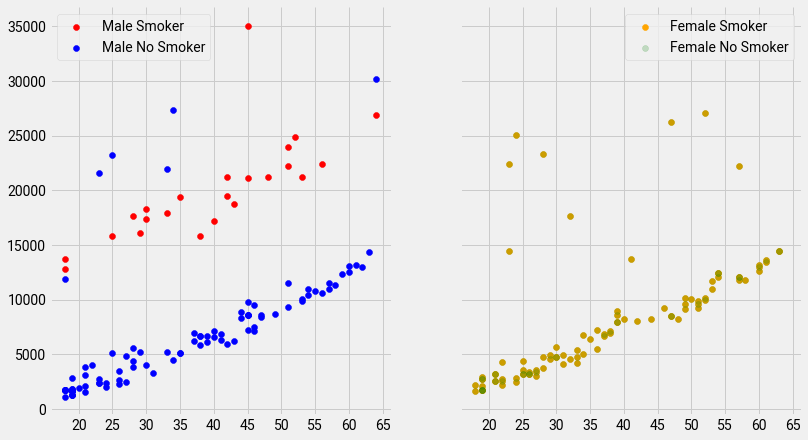

In [29]:
with plt.style.context(mpl):
    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    # cat: sex, dimension: age, charges
    ax1.scatter(male_smoker_lbmi25['age'], male_smoker_lbmi25['charges'], c='red', label='Male Smoker')
    ax2.scatter(female_smoker_lbmi25['age'], female_smoker_lbmi25['charges'], c='orange', label='Female Smoker')
    ax1.scatter(male_no_smoker_lbmi25['age'], male_no_smoker_lbmi25['charges'], c='blue', label='Male No Smoker')
    ax2.scatter(female_no_smoker_lbmi25['age'], female_no_smoker_lbmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

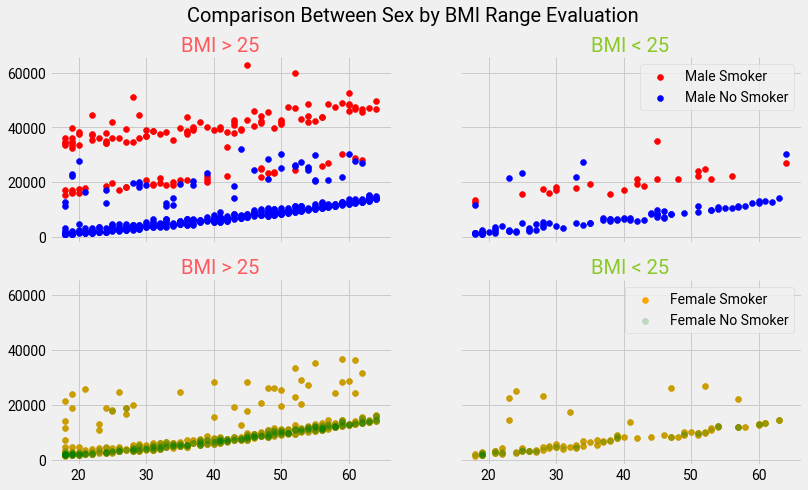

In [63]:
with plt.style.context(mpl):
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(male_smoker_bmi25['age'], male_smoker_bmi25['charges'], c='red', label='Male Smoker')
    ax1.scatter(male_no_smoker_bmi25['age'], male_no_smoker_bmi25['charges'], c='blue', label='Male No Smoker')
    ax2.scatter(male_smoker_lbmi25['age'], male_smoker_lbmi25['charges'], c='red', label='Male Smoker')
    ax2.scatter(male_no_smoker_lbmi25['age'], male_no_smoker_lbmi25['charges'], c='blue', label='Male No Smoker')

    ax3.scatter(female_smoker_bmi25['age'], female_smoker_bmi25['charges'], c='orange', label='Female Smoker')
    ax3.scatter(female_no_smoker_bmi25['age'], female_no_smoker_bmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)
    ax4.scatter(female_smoker_lbmi25['age'], female_smoker_lbmi25['charges'], c='orange', label='Female Smoker')
    ax4.scatter(female_no_smoker_lbmi25['age'], female_no_smoker_lbmi25['charges'], c='green', label='Female No Smoker', alpha=0.2)
    
    plt.suptitle('Comparison Between Sex by BMI Range Evaluation', fontsize=20)

    ax1.set_title('BMI > 25', color=bmiM25_cat)
    ax2.set_title('BMI < 25', color=bmiL25_cat)
    ax3.set_title('BMI > 25', color=bmiM25_cat)
    ax4.set_title('BMI < 25', color=bmiL25_cat)

    ax2.legend()
    ax4.legend()
    plt.show();

### Comparing BMI by Sex

In [64]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

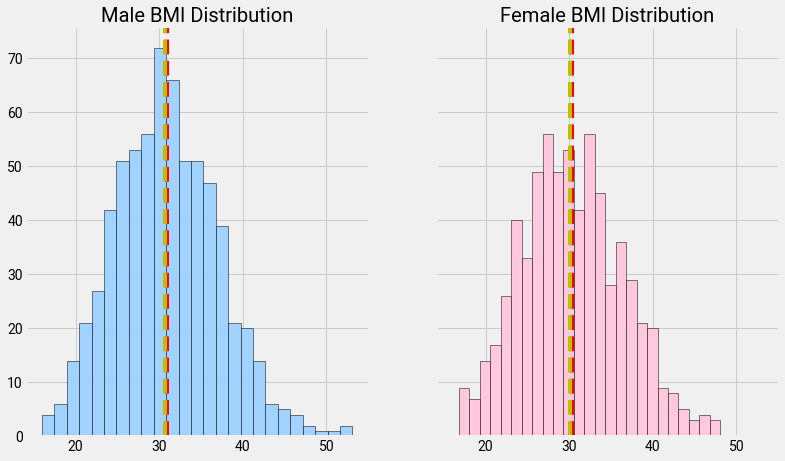

In [87]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharex=True, sharey=True)
    ax1.hist(
        male1['bmi'], 
        edgecolor='black',
        color=male_cat,
        bins=25)
    ax1.axvline(male1['bmi'].mean(), c='r', linestyle='--', label='BMI of Male Mean')
    ax1.axvline(male1['bmi'].median(), c='y', linestyle='--', label='BMI of Male Median')

    ax2.hist(
        female1['bmi'], 
        edgecolor='black',
        color=female_cat,
        bins=25)
    ax2.axvline(female1['bmi'].mean(), c='r', linestyle='--', label='BMI of Female Mean')
    ax2.axvline(female1['bmi'].median(), c='y', linestyle='--', label='BMI of Female Median')

    ax1.set(title='Male BMI Distribution')
    ax2.set(title='Female BMI Distribution')

    plt.show();

### Comparing BMI by Smoker Status

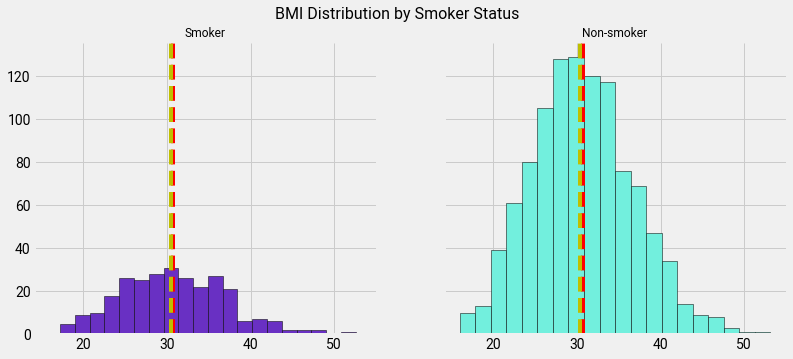

In [91]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)
    bmi_smoker = insurance_data[insurance_data['smoker'] == 'yes']  
    bmi_no_smoker = insurance_data[insurance_data['smoker'] == 'no']

    ax1.hist(
        bmi_smoker['bmi'], 
        edgecolor='black',
        color=smoker_cat,
        bins=20)
    ax1.axvline(bmi_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Smoker Mean')
    ax1.axvline(bmi_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Smoker Median')

    ax2.hist(
        bmi_no_smoker['bmi'], 
        edgecolor='black',
        color=nosmoker_cat,
        bins=20)
    ax2.axvline(bmi_no_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Non-smoker Mean')
    ax2.axvline(bmi_no_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Non-smoker Median')

    ax1.grid(visible=True)
    ax2.grid(visible=True)

    ax1.set(title="Smoker")
    ax2.set(title="Non-smoker")
    plt.suptitle("BMI Distribution by Smoker Status", fontsize=16)
    ax1.title.set_size(12)
    ax2.title.set_size(12)

    plt.show();

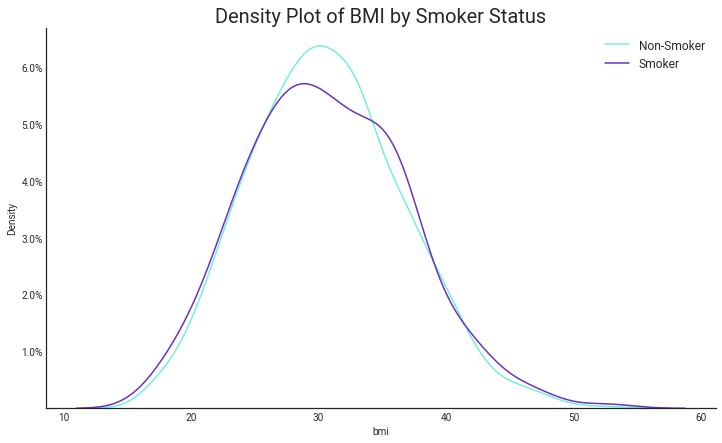

In [116]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.kdeplot(
        ax=ax, 
        data=bmi_no_smoker, 
        x='bmi', 
        color=nosmoker_cat, 
        label='Non-Smoker'
        )
    sns.kdeplot(
        ax=ax, 
        data=bmi_smoker, 
        x='bmi', 
        color=smoker_cat, 
        label='Smoker'
        )

    ax.set_title('Density Plot of BMI by Smoker Status', fontsize=20)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

    # Hide 0 on y-axis
    ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

    ax.legend(fontsize='large')


## Categorical Variable Analysis (PMF)

#### Top Charges by Sex

In [118]:
top_charges_sex = (insurance_data.groupby(
    ['sex']
    )['charges']
    ).max().reset_index()
top_charges_sex

,sex,charges
0,female,63770.42801
1,male,62592.87309


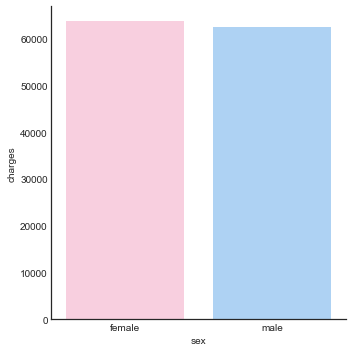

In [122]:
with plt.style.context(seaborn):
    # plot
    sns.catplot(data=top_charges_sex, x="sex", y="charges", palette=my_pal, kind="bar")

    plt.show();

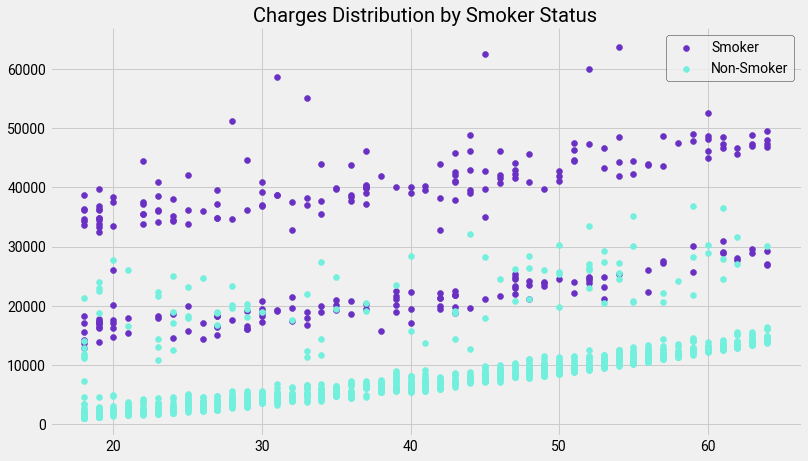

In [24]:
with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(smoker['age'], smoker['charges'], label='Smoker', c=smoker_cat)
    ax.scatter(no_smoker['age'], no_smoker['charges'], label='Non-Smoker', c=nosmoker_cat)
    ax.legend(edgecolor='black', fontsize=14)
    ax.set_title("Charges Distribution by Smoker Status")

    plt.show();

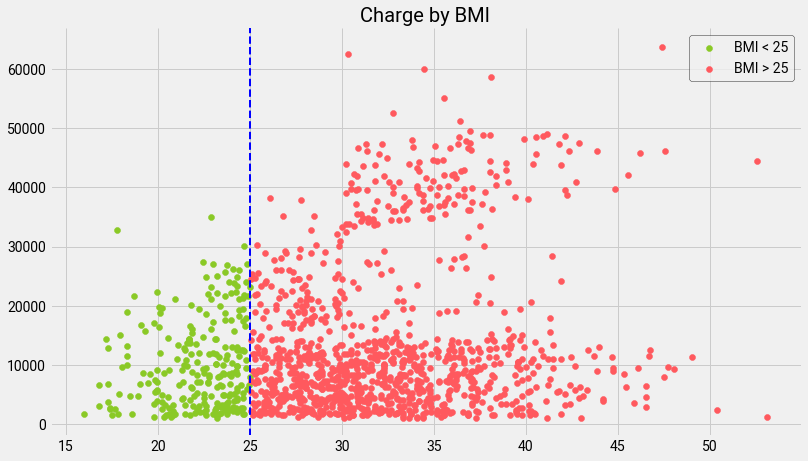

In [25]:
with plt.style.context(mpl): 
    bmi_l25 = insurance_data[insurance_data['bmi'] < 25]
    bmi_m25 = insurance_data[insurance_data['bmi'] > 25]

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(bmi_l25['bmi'], bmi_l25['charges'], c=bmiL25_cat, label='BMI < 25')
    ax.scatter(bmi_m25['bmi'], bmi_m25['charges'], c=bmiM25_cat, label='BMI > 25')

    ax.axvline(x = 25, color = 'blue', linestyle='--', linewidth=2)
    ax.set_title('Charge by BMI')
    ax.legend(edgecolor='black')

    plt.show();